In [1]:
# global imports
import pandas as pd
from matplotlib import pyplot
import numpy as np
from functs import *

In [2]:
# load dataset from CSV
series = pd.read_csv('data/SN_m_tot_V2.0.csv',sep=';',usecols=['DATEFRACTION','SSN'])
ssn=series['SSN']
time=series['DATEFRACTION']

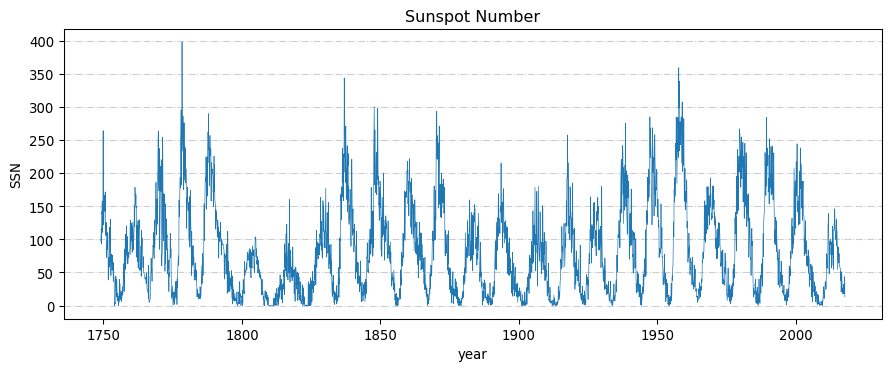

In [3]:
### SSN plot
plotTimeSeries(time,ssn,'Sunspot Number','year','SSN')

In [4]:
# calculate CWT
# results: normalized power spectra, scales (periods per Y coordinate), cone of interest, frequencies
power,scales,coi,freqs=calculateCWT(time,ssn,256)

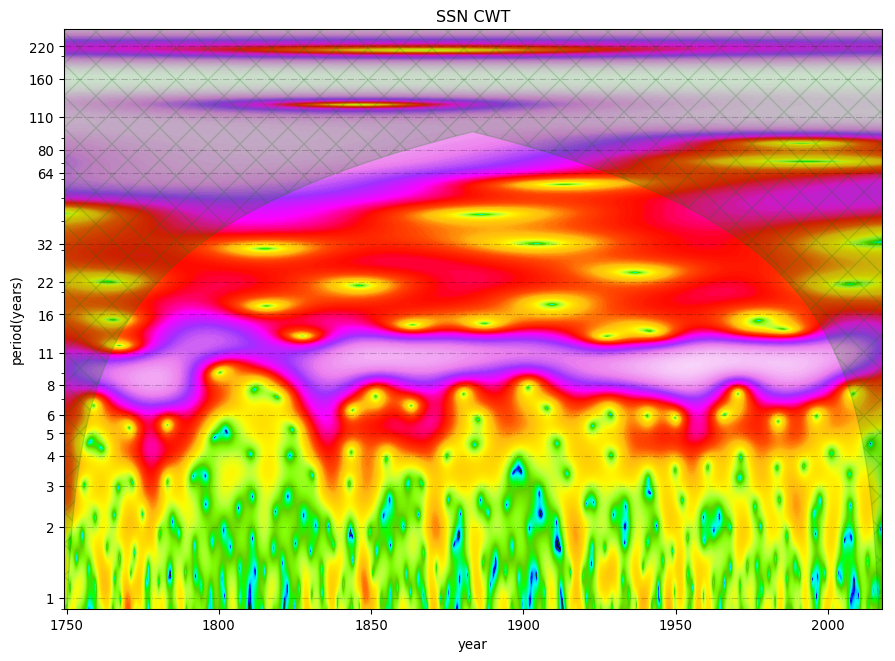

In [5]:
plotCWT(time,power,scales,coi,freqs,'SSN CWT','year','period(years)',
        yTicks=[0.5,1,2,3,4,5,6,8,11,16,22,32,64,80,110,160,220],lowerLimit=0.9,upperLimitDelta=0.5)

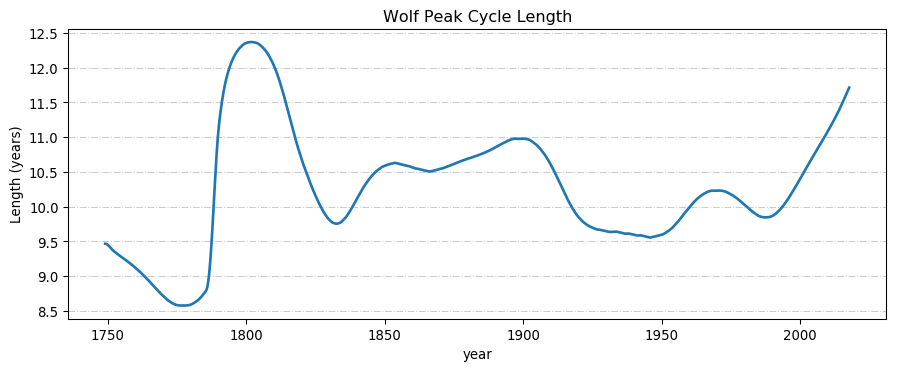

In [6]:
## Calculate and show the Wolf Cycle Length
wcl=findCycleLength(power,scales,6,16)
plotTimeSeries(time,wcl,'Wolf Peak Cycle Length','year','Length (years)',interpolate=True,width=2)

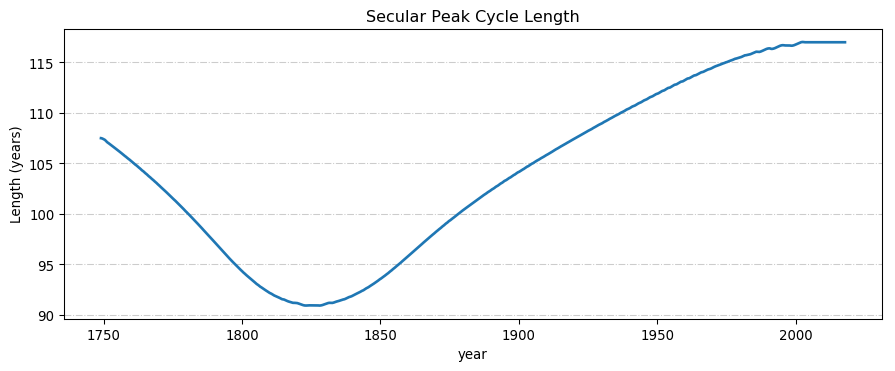

In [7]:
# inspect the ~100 years cycle
loong=findCycleLength(power,scales,80,128)
plotTimeSeries(time,loong,'Secular Peak Cycle Length','year','Length (years)',interpolate=True,width=2)